# Validate parquet files

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from plantclef.spark import get_spark

spark = get_spark()
display(spark)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/02/01 09:57:25 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/02/01 09:57:25 WARN SparkConf: Note that spark.local.dir will be overridden by the value set by the cluster manager (via SPARK_LOCAL_DIRS in mesos/standalone/kubernetes and LOCAL_DIRS in YARN).


In [4]:
import os
from pathlib import Path

# Get list of stored filed in cloud bucket
root = Path(os.path.expanduser("~"))
! date

Sat Feb  1 09:57:40 AM EST 2025


In [5]:
# Path and dataset names
data_path = f"{root}/p-dsgt_clef2025-0/shared/plantclef/data/parquet_files/"

# Define the path to the train and test parquet files
train_path = f"{data_path}/train"
test_path = f"{data_path}/test"

# Read the parquet files into a spark DataFrame
train_df = spark.read.parquet(train_path)
# test_df = spark.read.parquet(test_path)

# Show the data
train_df.show(n=5)
# test_df.show(n=5)

+--------------------+--------------------+--------------------+-----+----------+----------+--------+-------+-----------------+--------+-------------+-------------+---------------+-----------------+-------+----------+--------+---------+--------------------+--------------------+---------+--------------------+
|          image_name|                path|                data|organ|species_id|    obs_id| license|partner|           author|altitude|     latitude|    longitude|gbif_species_id|          species|  genus|    family| dataset|publisher|          references|                 url|learn_tag|    image_backup_url|
+--------------------+--------------------+--------------------+-----+----------+----------+--------+-------+-----------------+--------+-------------+-------------+---------------+-----------------+-------+----------+--------+---------+--------------------+--------------------+---------+--------------------+
|29e31f79ab026ded2...|/1355868/29e31f79...|[FF D8 FF E0 00 1...|habit|

### train images

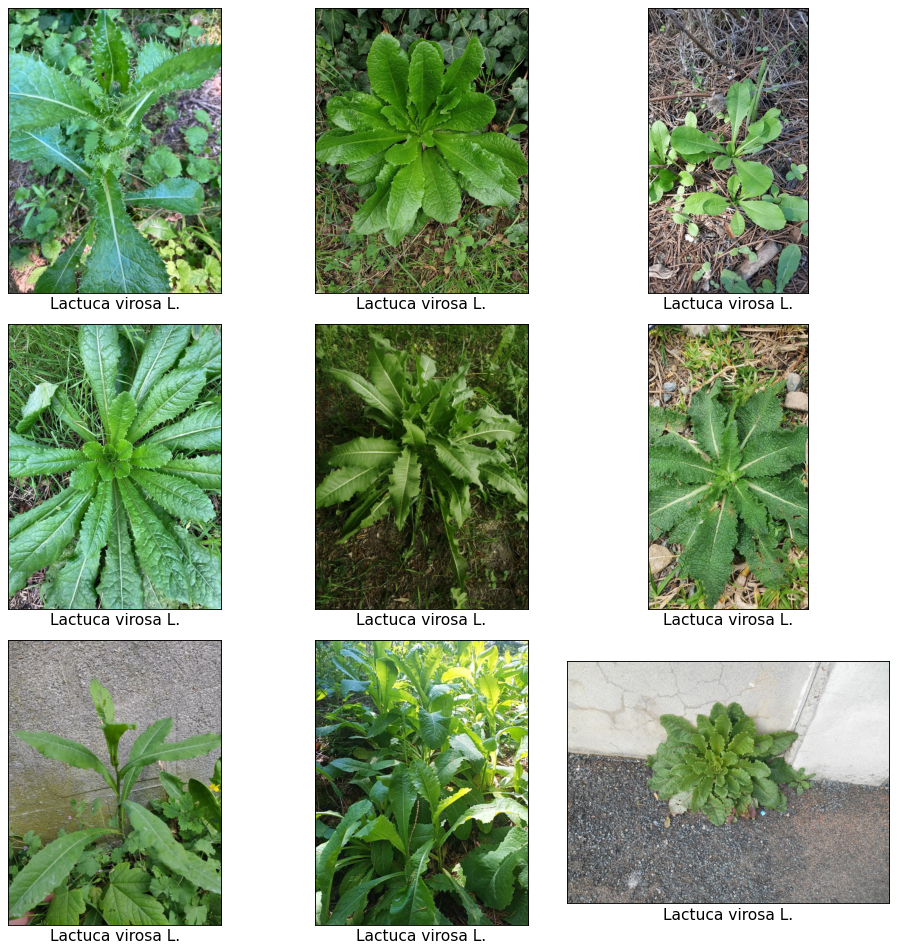

In [6]:
from plantclef.plotting import plot_images_from_binary

# Collect binary image data from DataFrame
rows, cols = 3, 3
subset_df = train_df.limit(rows * cols).collect()
image_data_list = [row["data"] for row in subset_df]
binomial_names = [row["genus"] for row in subset_df]

# Display the images in a grid with binomial names
plot_images_from_binary(
    train_df, data_col="data", image_col="species", grid_size=(3, 3)
)

In [7]:
train_df.count()

303

### test images

In [ ]:
# # Collect binary image data from DataFrame
# rows, cols = 3, 3
# subset_df = test_df.limit(rows * cols).collect()
# image_data_list = [row["data"] for row in subset_df]
# image_names = [row["image_name"].replace(".jpg", "") for row in subset_df]

# # Display the images in a grid with binomial names
# plot_images_from_binary(
#     test_df, data_col="data", image_col="image_name", grid_size=(3, 3)
# )

In [ ]:
# test_df.count()